In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('./drive/MyDrive')

In [ ]:
pwd

'/content/drive/MyDrive'

In [ ]:
git clone https://github.com/IBM/tensorflow-hangul-recognition

In [ ]:
!python drive/MyDrive/tensorflow-hangul-recognition/tools/hangul-image-generator.py

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
import shutil
from PIL import Image
import random

In [ ]:
for i in range(1,9538):
    img=Image.open(f'tensorflow-hangul-recognition/hangul-images/hangul_{i}.jpeg')
    img_to_mat=np.asarray(img).reshape(1024,)
    #print(img_to_mat.shape)
    np.savetxt(f'hangul{i}.csv',img_to_mat,delimiter=',')

In [ ]:
import pandas as pd
import glob
input_file='/content/drive/MyDrive'
output_file='/content/drive/MyDrive/test.csv'
allfile_list=glob.glob(os.path.join(input_file,'*.csv'))
#print(allfile_list)

allData=[]
for file in allfile_list:
    df=pd.read_csv(file)
    allData.append(df)

dataCombine=pd.concat(allData,axis=1).T

dataCombine.to_csv(output_file)

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/tensorflow-hangul-recognition/hangul.csv').astype('float32')
data.shape

(9537, 1024)

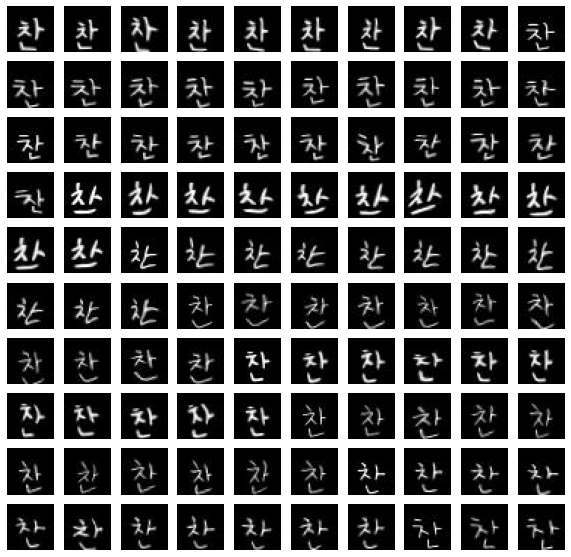

In [ ]:
width,height=32,32
X=data.values
X=X.reshape(X.shape[0],width,height,1)

plt.figure(figsize=(10,10))
for i in range(1,101):
    plt.subplot(10,10,i)
    image=X[i+99]
    plt.imshow(image[:,:,0],cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
index=[]
for i in range(9537):
    index.append(i)
random.shuffle(index)

data=data.reindex(index)
data.head

<bound method NDFrame.head of       Unnamed: 0    0    1    2    3    4  ...  1017  1018  1019  1020  1021  1022
7516         0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   1.0
8028         0.0  0.0  0.0  0.0  0.0  0.0  ...   2.0   2.0   2.0   2.0   1.0   0.0
954          0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
1535         0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
7612         0.0  0.0  0.0  0.0  0.0  0.0  ...   2.0   0.0   1.0   6.0   3.0   0.0
...          ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ...   ...
2080         0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
1757         0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
6330         0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
7064         0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
8285         0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.

In [ ]:
width,height=32,32
X=data.values
X=X.reshape(X.shape[0],width,height,1)
X.shape

(9537, 32, 32, 1)

In [ ]:
X=(X-127.5)/127.5

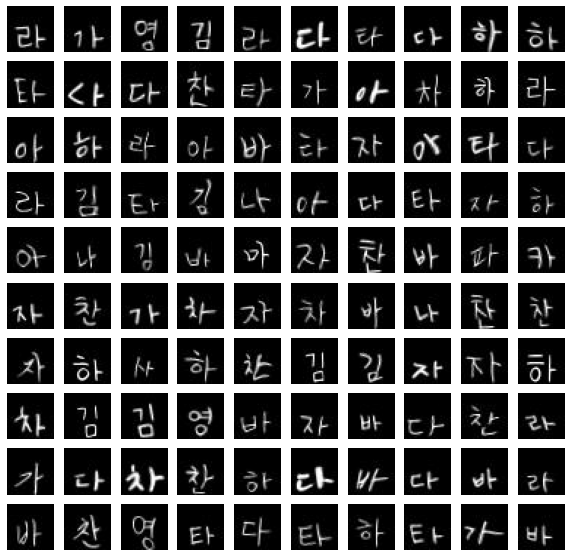

In [ ]:
plt.figure(figsize=(10,10))
for i in range(1,101):
    plt.subplot(10,10,i)
    image=X[i-1]
    plt.imshow(image[:,:,0],cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(X).shuffle(X.shape[0]).batch(32,drop_remainder=True).prefetch(1)
print(dataset)

<PrefetchDataset shapes: (32, 32, 32, 1), types: tf.float32>


In [ ]:
keras.backend.clear_session()

In [ ]:
generator=keras.models.Sequential([
        keras.layers.Dense(1024,use_bias=False,input_shape=[100]),
        keras.layers.BatchNormalization(),
        keras.layers.LeakyReLU(),
        keras.layers.Dense(8*8*128,use_bias=False),
        keras.layers.BatchNormalization(),
        keras.layers.LeakyReLU(),
    
        keras.layers.Reshape((8,8,128)),
        
        keras.layers.Conv2DTranspose(128,(5,5),strides=(1,1),padding='same', use_bias=False),
        keras.layers.BatchNormalization(),
        keras.layers.ReLU(),
        #(8,8)->(16,16)
        keras.layers.Conv2DTranspose(64,(5,5),strides=(2,2),padding='same', use_bias=False),
        keras.layers.BatchNormalization(),
        keras.layers.ReLU(),
        #(16,16)->(32,32)
        keras.layers.Conv2DTranspose(1,(5,5),strides=(2,2),padding='same', activation='tanh'),
])


In [ ]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              102400    
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 8192)              8388608   
                                                                 
 batch_normalization_1 (Batc  (None, 8192)             32768     
 hNormalization)                                                 
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 8192)              0

(-0.5, 31.5, 31.5, -0.5)

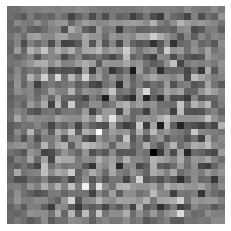

In [ ]:
noise=tf.random.normal([1,100])
generated_image=generator(noise,training=False)
plt.imshow(generated_image[0,:,:,0],cmap='gray')
plt.axis('off')

In [ ]:
 discriminator=keras.models.Sequential([
        #(32,32)->(16,16)
        keras.layers.Conv2D(64,(5,5),strides=2,padding='same',input_shape=[32,32,1]),
        keras.layers.LeakyReLU(0.2),
        keras.layers.Dropout(0.3),
        #(16,16)->(8,8)
        keras.layers.Conv2D(128,(5,5),strides=2,padding='same'),
        keras.layers.LeakyReLU(0.2),
        keras.layers.Dropout(0.3),

        keras.layers.Flatten(),
        
        keras.layers.Dense(256),
        keras.layers.LeakyReLU(0.2),
        keras.layers.Dropout(0.3),
        
        keras.layers.Dense(1),
    ])

In [ ]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 64)        1664      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 16, 16, 64)        0         
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 128)         204928    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 128)         0         
                                                                 
 flatten (Flatten)           (None, 8192)             

In [ ]:
predicted=discriminator(generated_image)
print(predicted)

tf.Tensor([[0.00392901]], shape=(1, 1), dtype=float32)


In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output) #생성된 가짜 이미지가 1이 되도록

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output) # 진짜 이미지가 1이 되도록
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output) # 생성된 가짜 이미지가 0이 되도록
    total_loss = real_loss + fake_loss
    return total_loss

In [ ]:
@tf.function
def train_step(images):
    noise = tf.random.normal([32, 100])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True) #가짜 이미지 생성

      real_output = discriminator(images, training=True) 
      fake_output = discriminator(generated_images, training=True) 

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables) #생성자 미분값 계산
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables) #판별자 미분값 계산

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables)) #생성자 backpropagation
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables)) #판별자 back propagation

In [ ]:
test_noise = tf.random.normal([100, 100])

# 학습 시각화
def show_generated_images(epoch):
    images = generator.predict(test_noise)
    images = 0.5 * images + 0.5
    
    plt.figure(figsize=(11,11))
    
    i = 1
    for image in images:
        image = image.reshape(width, height)
        plt.subplot(10, 10, i)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        i+=1

    plt.suptitle("Generated Images on EPOCH: %s" % epoch, fontsize = 25)
    plt.show()

In [ ]:
def train(dataset, epochs):
  for epoch in range(1,epochs+1): # 데이터 전체 반복
    
    for image_batch in dataset: # 배치 데이터 반복
      train_step(image_batch)

    print("%s epochs trained" % epoch)

    if epoch % 5 == 0 or epoch==1: # 5번 epoch이 돌 때마다 생성자의 이미지 시각화
        show_generated_images(epoch)

In [ ]:
train(dataset, 300)

Output hidden; open in https://colab.research.google.com to view.